# Handwritten Digit Recognition using CNN

## 1. Import necessary Librairies

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

2025-04-03 07:48:22.397760: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 07:48:22.415250: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 07:48:22.627098: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 07:48:22.738298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743666503.063255   11059 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743666503.13

##### __Explanation__:
- `tensorflow` and `keras`: Used for building and training the Convutional Neural Network (CNN).

- `minst`: This is the dataset we are using, which contains handwritten digits.

- `matplotlib.pyplot`: Used for visualising training results and sample predictions.

- `numpy`: Helps with numerical operations.

## 2. Load and Preprocess the Data

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing: Reshape and normalise the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


##### __Explanation__:
- `mnist.load_data()`: Loads the dataset, which contains 60,000 training images and 10,000 test images.

- `X_train`, `X_test`: These contain the grayscale images of digits (28x28 pixels).

- `y_train`, `y_test`: Labels (0-9) corresponding to each image.

- __Preprocessing__:

    - __Reshape__: CNN require 3D input (height, width, channels). We reshape from `(28,28)` to `(28,28,1)`, where `1` represents the grayscale channel.
    
    - __Normalise__: Pixel values (0-255) are divided by 255 to scale them between `0-1`, which improves model performance.

## 3. Build the CNN Model

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes for digit 0-9
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-03 08:02:13.000906: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


##### __Explanation__:
We build a __Convolutional Neural Network (CNN):__

1. `Conv2D(32, (3,3), activation='relu')`:

    - A convolutional layer with 32 filters of size __3x3__.

    - Extracts key features (edges, curves, etc.).

    - Uses __ReLU activation__ to introduce non-linearity.

2. `MaxPooling2D((2,2))`:

    - A pooling layer that reduces the size of feature maps (downsampling).

    - Helps in reducing computational cost and prevents overfitting.

3. `Conv2D(64, (3,3), activation='relu') + MaxPooling2D((2,2))`:

    - Another convolutional and pooling layer to extract more complex features.

4. `Flatten()`:

    - Converts the 2D feature maps into a 1D vector.

5. `Dense(64, activation='relu')`:

    - A fully connected (FC) layer with 64 neurons.

6. `Dense(10, activation='softmax)`:

    - The output layer with __10 neurons (0-9)__.
    
    - Uses __Softmax activation__, which converts logits into probability distributions.

## 4. Compile the Model

In [4]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##### __Explanation__:

- `Optimizer: adam`:

    - Adaptive optimiser that adjusts learning rates dynamically.

- `Loss function: 'sparse_categorical_crossentropy'`:

    - Used for multi-class classification when labels are integers (0-9).

- `Metric: 'accuracy'`:

    - Measures how well the model is performing.

## 5. Train the Model

In [5]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8708 - loss: 0.4011 - val_accuracy: 0.9836 - val_loss: 0.0593
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9830 - loss: 0.0546 - val_accuracy: 0.9846 - val_loss: 0.0524
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9882 - loss: 0.0364 - val_accuracy: 0.9852 - val_loss: 0.0498
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9905 - val_loss: 0.0367
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9932 - loss: 0.0211 - val_accuracy: 0.9893 - val_loss: 0.0400


##### __Explanation__:

- `fit(X_train, y_train, epoch=5, validation_split=0.2)`:

    - Trains the model for __5 epochs__.

    - Uses __80%__ of the data for training and __20%__ for validation.

## 6. Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9879 - loss: 0.0365
Test accuracy: 0.9901999831199646


##### __Explanation__:

- Test the model on __unseen test data__ and prints accuracy.

- This ensures the model generalises well to new handwritten digits.

## 7. Plot Training History

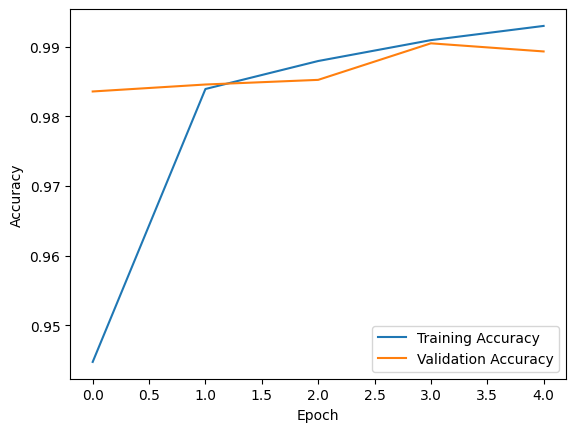

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

##### __Explanation__:

- Plots the accuracy over epochs.

- Helps us understand how well the model is learning.

## 8. Display Sample Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


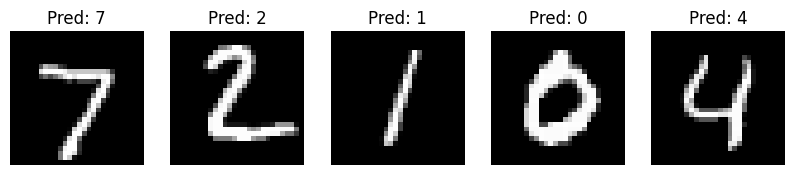

In [9]:
num_samples = 5
sample_images = X_test[:num_samples]
sample_labels = y_test[:num_samples]
predictions = np.argmax(model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')
plt.show()

##### __Explanation__:

- Selects __5 sample images__ from the test set.

- Uses the trained model to predict the digit.

- Plots images along with their predicted labels.